In [1]:
# Import basic modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("train.csv")
train.drop('Id', axis=1, inplace=True)

In [3]:
train_numeric = train.dtypes[train.dtypes != "object"].index
train_category = train.dtypes[train.dtypes == "object"].index

In [4]:
total = train.isnull().sum().sort_values(
        ascending=False)[train.isnull().sum().sort_values(ascending=False) != 0]
percent = (train.isnull().sum().sort_values(ascending=False) / len(train) *
               100)[(train.isnull().sum().sort_values(ascending=False) / len(train) *
                     100) != 0]
missing_values = pd.concat([total,percent], axis=1, keys=['Missing','Percent'])
missing_values.head(20)

,Missing,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageCond,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


In [5]:
 for col in train_category:
     train[col].replace(np.nan, train[col].mode(), inplace=True)

for col in train_numeric:
    train[col].replace(np.nan, train[col].median(), inplace=True)

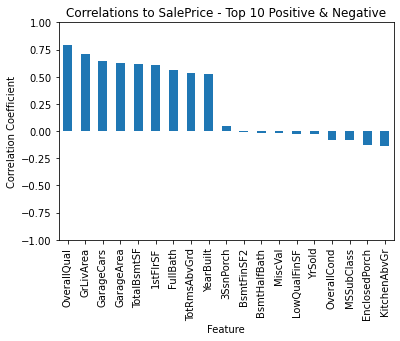

In [6]:
top20 = pd.concat([train.corr()['SalePrice'].sort_values(ascending=False)[1:10], train.corr()['SalePrice'].sort_values(ascending=False)[-10:]])
ax = top20.plot.bar()
ax.set_ylim(-1.0, 1.0)
plt.title("Correlations to SalePrice - Top 10 Positive & Negative")
plt.xlabel("Feature")
plt.ylabel("Correlation Coefficient")
plt.grid(False)
plt.show()

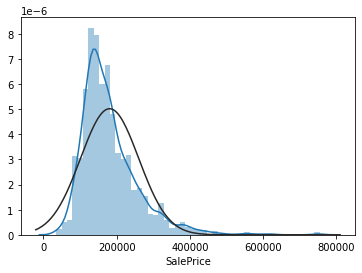

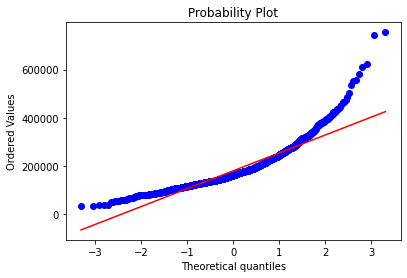

In [7]:
from scipy.stats import norm
from scipy import stats
sns.distplot(train.SalePrice, fit=norm);
fig = plt.figure()
res = stats.probplot(train.SalePrice, plot=plt)

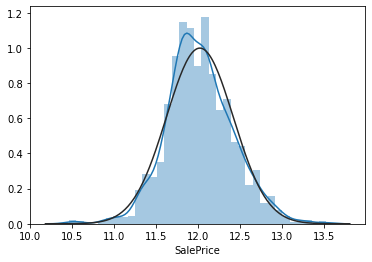

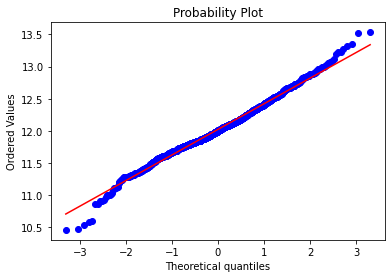

In [8]:
train.SalePrice = np.log(train.SalePrice)

sns.distplot(train.SalePrice, fit=norm);
fig = plt.figure()
res = stats.probplot(train.SalePrice,plot=plt)

In [9]:
# Train-test split
from sklearn.model_selection import train_test_split

train = pd.get_dummies(train)

X = train.drop(['SalePrice'], axis=1).values

# Square root of the output to make high values less dominant
y = np.sqrt(train['SalePrice'].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape,y_train.shape)

(978, 288) (978,)


In [10]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
lasso_reg=Lasso(alpha=0.00001, normalize=True)
lasso_reg.fit(X_train,y_train)

train_score=lasso_reg.score(X_train,y_train)
test_score=lasso_reg.score(X_test,y_test)
coeff_used00001 = np.sum(lasso_reg.coef_!=0)

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

print("LR training score:", lr_train_score) 
print("LR test score: ", lr_test_score)

print("training score for alpha=0.0001:", train_score) 
print("test score for alpha =0.0001: ", test_score)
print("number of features used: for alpha =0.0001:", coeff_used00001)

LR training score: 0.9475690712646158
LR test score:  0.8935370028315608
training score for alpha=0.0001: 0.9392916820701825
test score for alpha =0.0001:  0.9137411257052472
number of features used: for alpha =0.0001: 149


In [11]:
from sklearn.metrics import mean_squared_error
predictions=lasso_reg.predict(X_test)
LR_predictions=lr.predict(X_test)


MSE=mean_squared_error(y_test,predictions)
r2=lasso_reg.score(X_test,y_test)

MSE2=mean_squared_error(y_test,LR_predictions)
r22=lr.score(X_test,y_test)

print(f"MSE: {MSE}, R2: {r2}")
print(f"MSE: {MSE2}, R2: {r22}")

MSE: 0.00030513049458121553, R2: 0.9137411257052472
MSE: 0.00037660017298162793, R2: 0.8935370028315608
